In [1]:
from random import random, choice
from core import Agent
from gym import Env
import gym
from gridworld import WindyGridWorld, SimpleGridWorld
from utils import str_key, set_dict, get_dict
from utils import epsilon_greedy_pi, epsilon_greedy_policy
from utils import greedy_policy, learning_curve

In [2]:
class QAgent(Agent):
    def __init__(self, env:Env, capacity:int = 20000):
        super(QAgent, self).__init__(env, capacity)
        self.Q = {}

    def policy(self, A, s, Q, epsilon):
        return epsilon_greedy_policy(A, s, Q, epsilon)
    
    def learning_method(self, gamma = 0.9, alpha = 0.1, epsilon = 1e-5, display = False, lambda_ = None):
        self.state = self.env.reset()
        s0 = self.state
        if display:
            self.env.render()
        # a0 = self.perform_policy(s0, epsilon)

        time_in_episode, total_reward = 0, 0
        is_done = False
        while not is_done:
            # add code here
            self.policy = epsilon_greedy_policy
            a0 = self.perform_policy(s0, self.Q, epsilon)
            s1, r1, is_done, info, total_reward = self.act(a0)
            if display:
                self.env.render()
            self.policy = greedy_policy
            a1 = greedy_policy(self.A, s1, self.Q)
            old_q = get_dict(self.Q, s0, a0)
            q_prime = get_dict(self.Q, s1, a1)
            td_target = r1 + gamma * q_prime
            #alpha = alpha / num_episode
            new_q = old_q + alpha * (td_target - old_q)
            set_dict(self.Q, new_q, s0, a0)
            # s0, a0 = s1, a1
            s0 = s1
            time_in_episode += 1
        if display:
            print(self.experience.last_episode)
        return time_in_episode, total_reward    

In [3]:
env = WindyGridWorld()
agent = QAgent(env)

data = agent.learning(gamma = 1.0, 
                            epsilon = 0.1,
                            decaying_epsilon = True,
                            alpha = 0.5, 
                            max_episode_num = 800, 
                            display = False)


100%|██████████| 800/800 [00:00<00:00, 902.39it/s]


In [4]:
agent.learning_method(epsilon = 0.01, display = False)
data = agent.learning(gamma = 1.0, display = False, max_episode_num = 100)

100%|██████████| 100/100 [00:00<00:00, 1150.22it/s]


No handles with labels found to put in legend.


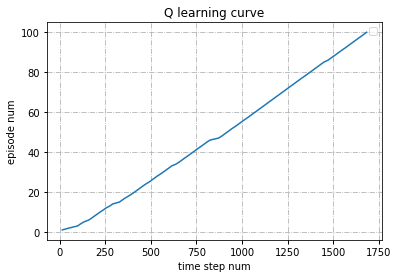

In [5]:
learning_curve(data, x_index = 0, y1_index = 2, y2_index = None,
               title="Q learning curve", x_name = "time step num", y_name = "episode num")

In [6]:
env.reset()
env.render()
#agent.learning(display = True, max_episode_num = 100)

True

In [7]:
env.close()